# MISURA DEL COEFFICIENTE DI VISCOSITA' DELLA GLICERINA

le misure sono state raccolti in due giorni differenti a temperature differenti

In [15]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

#from B import calcB,calcSigmaB, calcSigmaY_y_A_BX, calcA, calcSigmaA

import os

dir_path = os.path.abspath('')
FILE1 = dir_path + '/../CSV/' + 'T=24.5°C.csv'
FILE2 = dir_path + '/../CSV/' + 'T=18.5°C.csv'

fr1 = pd.read_csv(FILE1)  # fileread
fr2 = pd.read_csv(FILE2)

T24 = np.array([np.array(fr1[str(i)]) for i in range(2,7)]) # s
T18 = np.array([np.array(fr2[str(i)]) for i in range(2,7)]) # s

d = 0.2 #m distanza percorsa in t

t_medie24 = np.array([np.mean(i) for i in T24])  # calcola le medie dei tempi per ogni diametro
sigma_t24 = np.array([np.std(i) for i in T24]) / len(T24)
v_medie24 = d / t_medie24  # calcola le medie delle velocità per ogni diametro

t_medie18 = np.array([np.mean(i) for i in T18])  # calcola le medie dei tempi per ogni diametro
sigma_t18 = np.array([np.std(i) for i in T18]) / len(T18)
v_medie18 = d / t_medie18  # calcola le medie delle velocità per ogni diametro

raggi = (np.array([2, 3, 4, 5, 6])/2)*0.001 # m


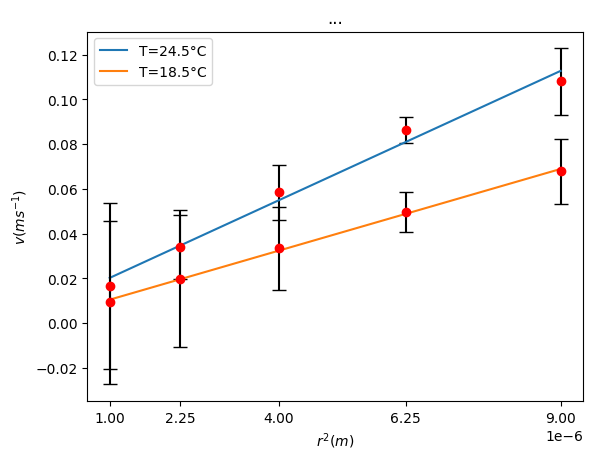


linearità A + BX
    
A: 0.0031526782649768715 
B: 7302.661491771974
sigmaA: 1.1363526401347714e-06
sigmaB: 39977.22691311902

sigmaY: 0.0012783072213368527
chiquadro ridotto: 0.0
df: 3
    


linearità A + BX
    
A: 0.008620114249294281 
B: 11564.721073518514
sigmaA: 1.751390470423681e-05
sigmaB: 616144.461746282

sigmaY: 0.005018456196665986
chiquadro ridotto: 0.0
df: 3
    



In [16]:
import matplotlib.pyplot as plt
from interpolazione3 import RettaInterpolata

r24 = RettaInterpolata(raggi**2,v_medie24)
plt.errorbar(raggi**2,v_medie24,yerr=sigma_t24, fmt='o',ecolor='black',capsize=5,color='red')
plt.plot(r24.x_best, r24.y_best, label="T=24.5°C")

r18 = RettaInterpolata(raggi**2,v_medie18)
plt.errorbar(raggi**2,v_medie18,yerr=sigma_t18, fmt='o',ecolor='black',capsize=5,color='red')
plt.plot(r18.x_best, r18.y_best, label="T=18.5°C")

plt.xticks(raggi**2)
plt.legend()
plt.title('...')
plt.xlabel("$r^2 (m)$")
plt.ylabel("$v (ms^{-1})$")

plt.show()

print(r18)
print(r24)